In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#import dataset
train = pd.read_csv("/content/titanic_train.csv")

##Data Exploration

In [ ]:
train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [ ]:
train.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

In [ ]:
train.shape

(850, 15)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [ ]:
#column-wise missing values
round((train.isnull().sum()/train.shape[0])*100,2)

passenger_id     0.00
pclass           0.00
name             0.00
sex              0.00
age             20.47
sibsp            0.00
parch            0.00
ticket           0.00
fare             0.12
cabin           77.53
embarked         0.12
boat            63.76
body            91.41
home.dest       45.41
survived         0.00
dtype: float64

In [ ]:
unnecessary_columns = ['passenger_id','cabin','name','ticket','boat','boat','home.dest']
train.drop(unnecessary_columns,axis=1,inplace=True)

In [ ]:
train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,body,survived
0,3,female,NaN,0,0,7.7333,Q,NaN,1
1,3,male,38.0,0,0,8.6625,S,NaN,0
2,3,female,30.0,1,1,24.1500,S,NaN,0
3,2,female,54.0,1,3,23.0000,S,NaN,1
4,2,male,40.0,0,0,13.0000,S,NaN,0


##Data Visualization

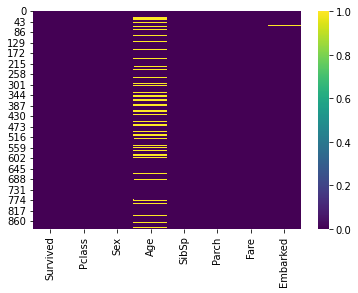

In [ ]:
#missing value
sns.heatmap(train.isnull(),cmap='viridis')

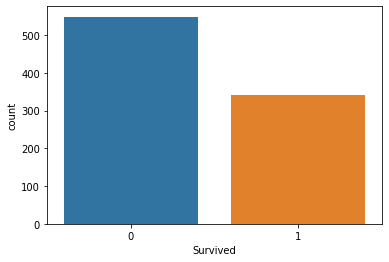

In [ ]:
#0 - No - Did not survived
#1 - Yes - Survived
sns.countplot(x='Survived',data=train)

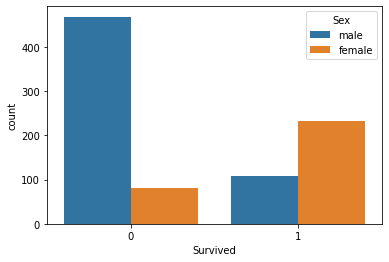

In [ ]:
sns.countplot(x='Survived',hue ='Sex',data=train)

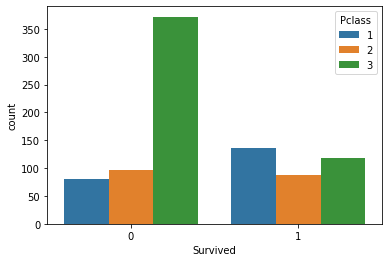

In [ ]:
sns.countplot(x='Survived',hue ='Pclass',data=train)

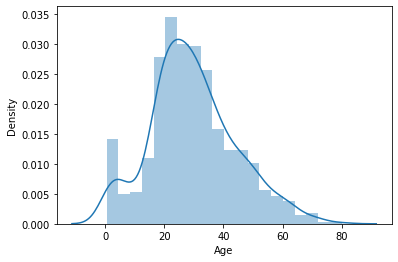

In [ ]:
sns.distplot(train['Age'])

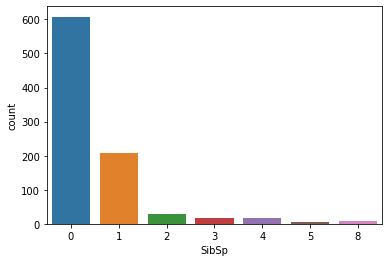

In [ ]:
sns.countplot(x= 'SibSp',data= train)

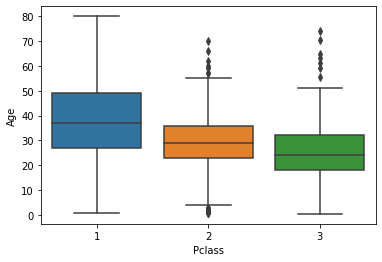

In [ ]:
sns.boxplot(x = "Pclass",y="Age",data=train)

In [ ]:
train['age'].mean()

29.519847189349115

In [ ]:
train['age'].median()

28.0

In [ ]:
train['age'].mode()

0    18.0
dtype: float64

In [ ]:
def age_impute(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass ==1:
      return 38
    elif Pclass ==2:
      return 30
    else:
      return 25
  else:
    return Age

In [ ]:
train['age'] = train[['age','pclass']].apply(age_impute,axis=1)

In [ ]:
train['Age'].isnull().sum()

0

In [ ]:
train.to_csv("titanic_dataset.csv")

In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

## Data Preparation

In [ ]:
train.dropna(inplace=True)

In [ ]:
sex = pd.get_dummies(train["sex"],drop_first=True)
embark = pd.get_dummies(train["embarked"],drop_first=True)

In [ ]:
train.drop(['sex','embarked'],axis=1, inplace=True)

In [ ]:
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
train

,pclass,age,sibsp,parch,fare,body,survived,male,Q,S
5,3,28.0,0,0,22.5250,173.0,0,1,0,1
14,3,16.0,1,1,20.2500,190.0,0,1,0,1
29,1,42.0,1,0,52.0000,38.0,0,1,0,1
40,3,38.5,0,0,7.2500,32.0,0,1,0,1
45,3,34.0,0,0,8.0500,176.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
816,3,26.5,0,0,7.2250,304.0,0,1,0,0
831,1,64.0,0,0,26.0000,263.0,0,1,0,1
843,3,18.0,1,0,6.4958,314.0,0,1,0,1
846,1,58.0,0,0,29.7000,258.0,0,1,0,0


##Scaling

In [ ]:

X = train.drop(['survived'],axis=1)
y = train['survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=100)

##Training

##Hyperparameter Tunning

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters = {
    'penalty' : ['l1','l2','elasticnet'],
    'solver' : ['newton-cg','liblinear','lbfgs'] 
}

In [ ]:
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
clf = GridSearchCV(logreg,
             param_grid=parameters,
             scoring = "accuracy",
             cv=5)



In [ ]:
import warnings
warnings.filterwarnings('ignore')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs']},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
clf.best_score_

0.8118322580645161

## Model Building

In [ ]:
logreg = LogisticRegression(penalty='l2',solver = 'newton-cg')
logreg.fit(X_train,y_train)


LogisticRegression(solver='newton-cg')

In [ ]:
logreg.score(X_test,y_test)

0.7865168539325843

## Model Evaluation

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       160
           1       0.76      0.68      0.72       107

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.78      0.79      0.78       267



K-NearestNeighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier = KNeighborsClassifier()

In [ ]:
KNNClassifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
KNNClassifier.score(X_test,y_test)

0.6779026217228464

In [ ]:
y_pred = KNNClassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       160
           1       0.61      0.55      0.58       107

    accuracy                           0.68       267
   macro avg       0.66      0.66      0.66       267
weighted avg       0.67      0.68      0.67       267



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# use a full grid over all parameters
param_grid = {"max_depth": [2,3,4,5],
              "max_features": [1, 3,5, 10],
              "min_samples_split": [2, 3,5, 10],
              "criterion": ["gini", "entropy"], "min_samples_leaf":[1,2,3,4]}

# run grid search
grid_search = RandomizedSearchCV(tree, param_distributions=param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 5,
 'max_depth': 5,
 'criterion': 'entropy'}

In [ ]:
#import scikit learn metrics to calculate accuracy
from sklearn import metrics
model = DecisionTreeClassifier(criterion='gini',max_depth=4,max_features=3,min_samples_split=3,min_samples_leaf =2)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print ('Accuracy:',metrics.accuracy_score(y_test,pred))

Accuracy: 0.7902621722846442


In [ ]:
#comparision to actual vs predicted values of model 1
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result.head()

,Actual,Predicted
639,0,1
147,0,0
278,0,0
484,1,1
770,0,0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       160
           1       0.76      0.69      0.73       107

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267



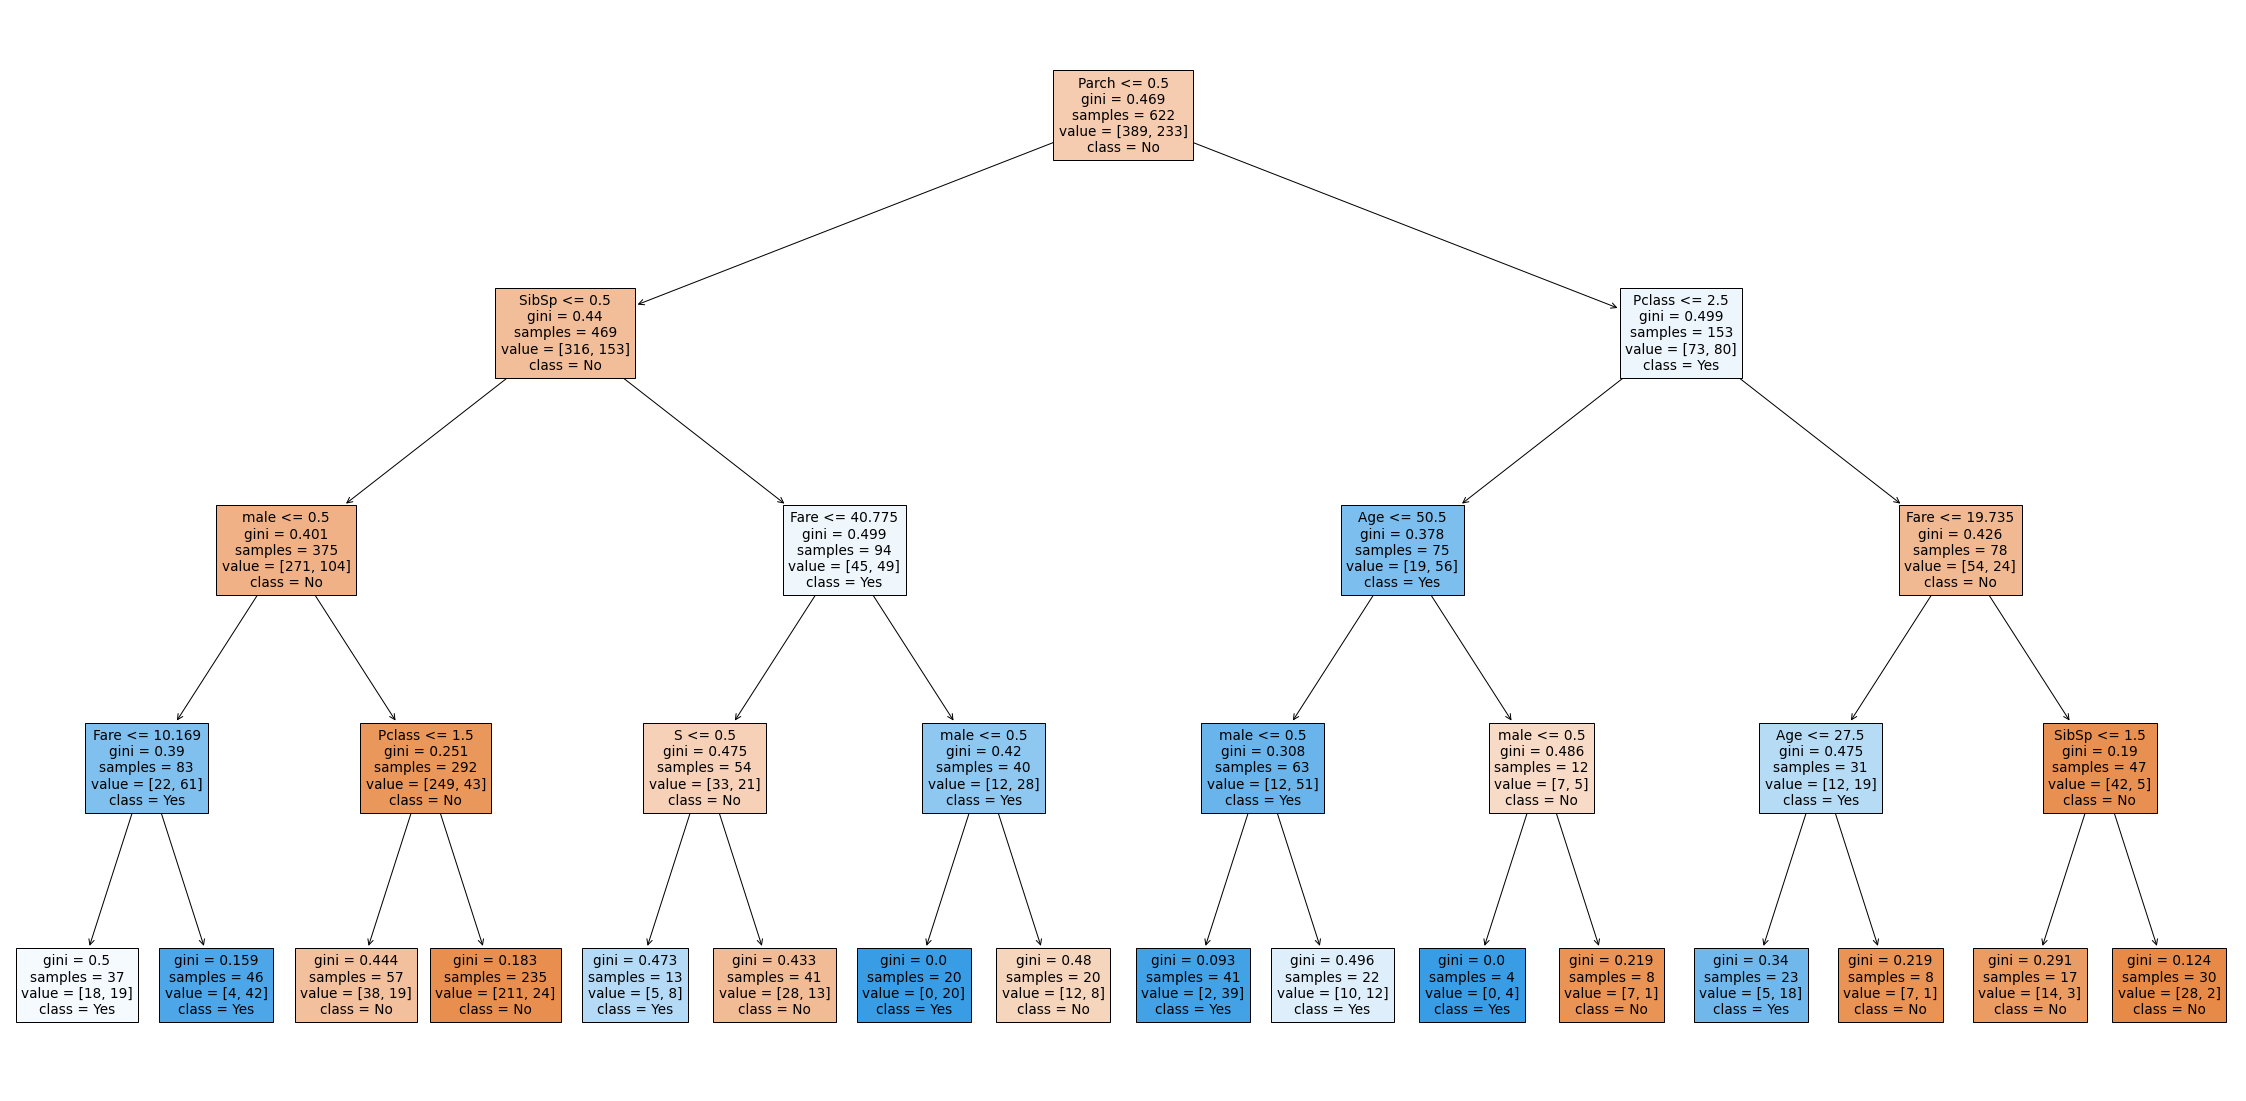

In [ ]:
#decision tree for model 3 , where max_depth was 2

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
plot_tree(model,class_names=['No','Yes'],feature_names=X_train.columns,filled=True)
plt.show()


In [ ]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Random Forest

from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
#import random forest 
from sklearn.ensemble import RandomForestClassifier
# Define the hyperparameter configuration space
rf_params = {
              "n_estimators":[100,200],
              "max_depth": [3, 4],        
              "criterion": ["gini", "entropy"]}
clf = RandomForestClassifier(random_state=0)
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=20, n_jobs=-1,scoring='accuracy')
#number of iterations is set to 20, you can increase this number if time permits
Bayes.fit(X, y)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

OrderedDict([('criterion', 'gini'), ('max_depth', 4), ('n_estimators', 179)])
Accuracy:0.8077016410349743


In [ ]:
# build a classifier with best of Grid search
rf_grid_search = RandomForestClassifier(n_estimators=100,criterion = 'gini',max_depth =4)

#Train the model using the training sets with best of Grid search
rf_grid_search.fit(X_train, y_train)

#Predict the response for test dataset with best of Grid search
y_pred = rf_grid_search.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7790262172284644
Precision: 0.8333333333333334
Recall: 0.5607476635514018


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter configuration space
rf_params = {
              "n_estimators":[100,200],
              "max_depth": [3, 4],        
              "criterion": ["gini", "entropy"]}
clf = RandomForestClassifier(random_state=0)
rscv = RandomizedSearchCV(clf, param_distributions=rf_params,cv=5,scoring='accuracy')
rscv.fit(X_train, y_train)
print(rscv.best_params_)
bclf = rscv.best_estimator_
print("Accuracy:"+ str(rscv.best_score_))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 100, 'max_depth': 3, 'criterion': 'gini'}
Accuracy:1.0


In [ ]:
RFC = RandomForestClassifier(n_estimators=100,max_depth=3,criterion='gini',random_state=20)

In [ ]:
RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=20)

In [ ]:
y_pred = RFC.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

